## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mice_data= combined_df.loc[:,["Mouse ID"]]
mice_data= mice_data.drop_duplicates()


In [3]:
num_mice= mice_data.count()[0]
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df[combined_df.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mice_data.loc[mice_data['Mouse ID']!='g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df = mice_data.loc[mice_data['Mouse ID']!='g989']
num_mice2= cleaned_df.count()[0]
num_mice2

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_data= combined_df.groupby(["Drug Regimen"])
tumor_mean=drug_data[("Tumor Volume (mm3)")].mean()
tumor_median=drug_data[("Tumor Volume (mm3)")].median()
tumor_variance=drug_data[("Tumor Volume (mm3)")].var()
tumor_std=drug_data[("Tumor Volume (mm3)")].std()
tumor_sem=drug_data[("Tumor Volume (mm3)")].sem()

regimen= combined_df["Drug Regimen"].value_counts()

tumor_stats= pd.DataFrame({"Mean Tumor Volume":tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_std, "Tumor Volume Std. Err." : tumor_sem})
tumor_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

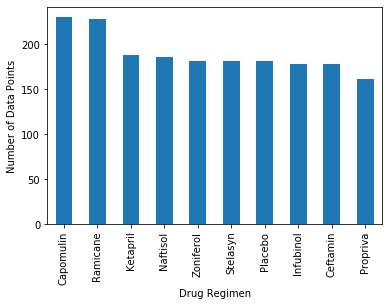

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug_pybar= regimen.plot(kind="bar")
drug_pybar.set_xlabel("Drug Regimen")
drug_pybar.set_ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

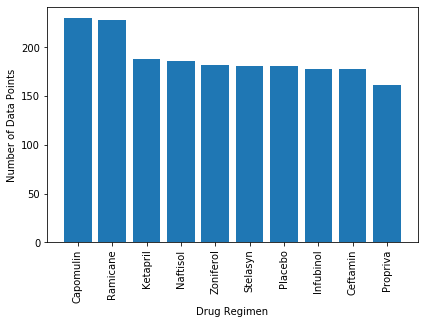

In [32]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(regimen.index.values,regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Pie Plots

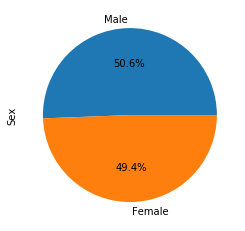

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender= combined_df["Sex"].value_counts()

gender_pybar= mouse_gender.plot(kind="pie",autopct = "%1.1f%%")

plt.show()
plt.tight_layout()

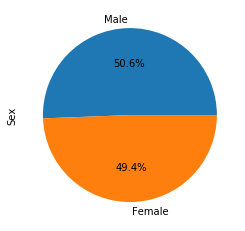

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender.values,labels=mouse_gender.index.values,autopct = "%1.1f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_vol= combined_df.groupby(["Mouse ID"]).max()
final_vol=final_vol.reset_index()
merged_data = final_vol[['Mouse ID','Timepoint']].merge(combined_df,on=['Mouse ID','Timepoint'],how="left")
merged_data.head(25)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


Values below 20.70456164999999 could be outliers for Capomulin.


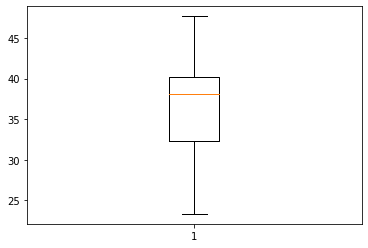

In [45]:
#Capomulin, Ramicane, Infubinol, Ceftamin
Capomulin=merged_data.loc[merged_data["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Capomulin.")
plt.boxplot(Capomulin)
plt.show()

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

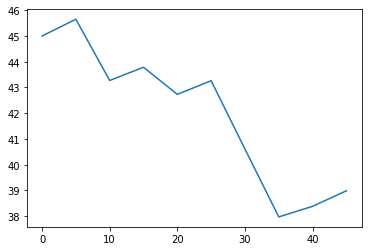

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin b128
b128_mouse=combined_df.loc[combined_df["Mouse ID"] == "b128"]
plt.plot(b128_mouse["Timepoint"], b128_mouse["Tumor Volume (mm3)"])
plt.show()

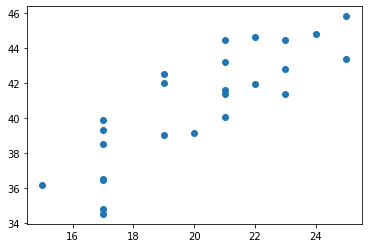

In [55]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin2=combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
mean_mouse= Capomulin2.groupby("Mouse ID").mean()
plt.scatter(mean_mouse["Weight (g)"], mean_mouse["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
